In [2]:
P_B = 0.86 * 13 / 86 + 0.14 * 10 / 14 #модель посчитала файл вирусным, полная вероятность
P_A = 14 / 100 #случайный файл - вирусный
P_BA = 10 / 14 #модель посчитала вирусным файл вирусным
P_AB = P_A * P_BA / P_B 
P_AB 

0.43478260869565216

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
from sklearn import tree

/home/gkuznetsov@prominn.local/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [4]:
# Создаём обучающую выборку
ames_data = pd.read_csv('./AmesHousing.csv')
ames_data = ames_data[(ames_data['Lot Frontage'] <=150) & (ames_data['Lot Area'] <=20000)]
X = ames_data[['Lot Frontage', 'Lot Area']]
y = ames_data['SalePrice']
ames_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500


In [5]:
X.head() #ширина фасада и площадь объекта недвижимости

,Lot Frontage,Lot Area
1,80.0,11622
2,81.0,14267
3,93.0,11160
4,74.0,13830
5,78.0,9978


In [6]:
# Инициализируем модель дерева решений с максимальной глубиной 3 и обучаем её
dt_reg = tree.DecisionTreeRegressor(max_depth=3)
dt_reg.fit(X.values, y)

DecisionTreeRegressor(max_depth=3)

In [7]:
# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    dt_reg, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=False, #отображать ли неоднородность
);

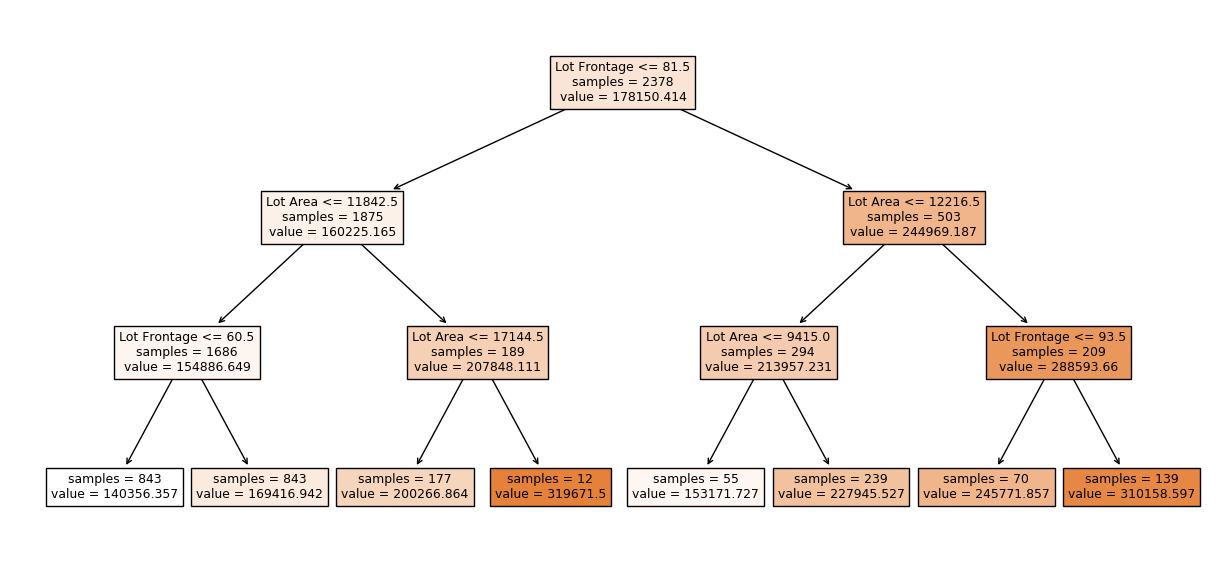

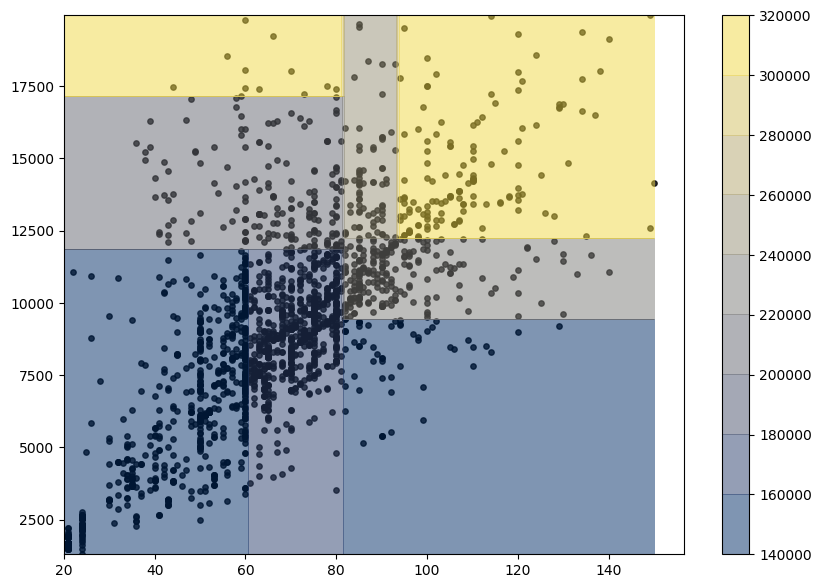

In [8]:
def plot_decision_bound_regression(X, y, model, fig):
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 1)
    )
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    y_pred = model.predict(X_net)
    y_pred = y_pred.reshape(xx1.shape)
    plt.scatter(x=X.iloc[:, 0], y=X.iloc[:, 1], s=15, color='black', alpha=0.8)
    contour = plt.contourf(xx1, xx2, y_pred, 10, cmap='cividis', alpha=0.5)
    fig.colorbar(contour)

# Визуализируем разделяющую поверхность дерева решений
fig = plt.figure(figsize = (10, 7))
plot_decision_bound_regression(X, y, dt_reg, fig)

plt.show()

В случае задачи классификации (Decision Tree Classifier) ответ модели (класс объекта) будет определяться голосанием большинства внутри области Rp, то есть дерево будет возвращать тот класс, который наиболее популярен в области Rp, соответствующий листовой вершины.

In [9]:
# изображения подвергаются специальному вейвлет-преобразованию: изображения кодируются в наборы числе
# в качестве примера для визуальзации используем дисперсию Variance и асимметрию Skewness
# Создаём обучающую выборку    
bill_data = pd.read_csv('./bill_authentication.csv')
X = bill_data[['Variance', 'Skewness']]
y = bill_data['Class']

bill_data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [10]:
# Инициализируем модель дерева решений с максимальной глубиной 4 и обучаем её
dt_clf = tree.DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X.values, y)

DecisionTreeClassifier(max_depth=4)

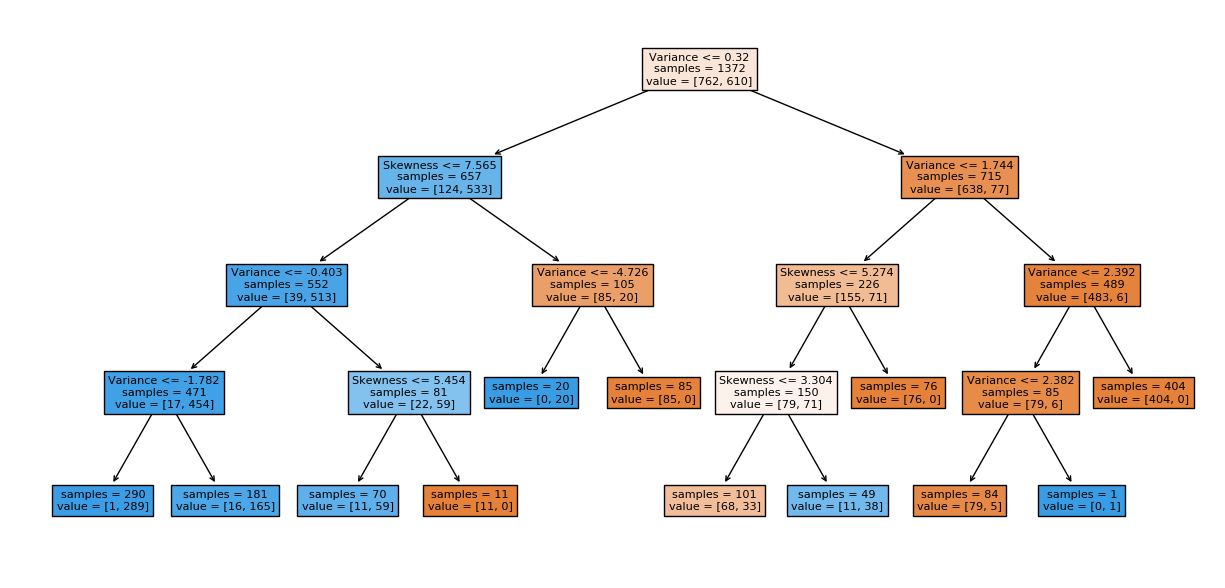

In [11]:
# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    dt_clf, #дерево решений
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=False, #отображать ли неоднородность
);

plt.show()

In [12]:
bill_data['Class']

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

In [13]:
# As many colors as there are unique midwest['category']
categories = np.unique(bill_data['Class'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

In [14]:
categories

array([0, 1])

In [15]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)]

In [20]:
X.iloc[:, 0]

0       3.62160
1       4.54590
2       3.86600
3       3.45660
4       0.32924
         ...   
1367    0.40614
1368   -1.38870
1369   -3.75030
1370   -3.56370
1371   -2.54190
Name: Variance, Length: 1372, dtype: float64

In [24]:
list( enumerate(categories) )

[(0, 0), (1, 1)]

In [26]:
X

,Variance,Skewness
0,3.62160,8.66610
1,4.54590,8.16740
2,3.86600,-2.63830
3,3.45660,9.52280
4,0.32924,-4.45520
...,...,...
1367,0.40614,1.34920
1368,-1.38870,-4.87730
1369,-3.75030,-13.45860
1370,-3.56370,-8.38270


In [28]:
bill_data.Class

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 1000x700 with 0 Axes>

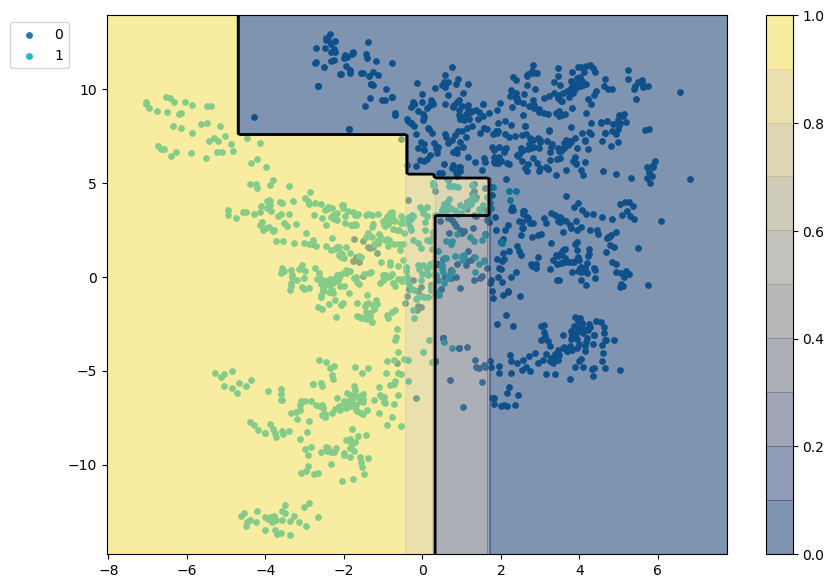

In [29]:
def plot_decision_bound_classification(X, y, model, fig):
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    probs = model.predict_proba(X_net)[:, 1]
    probs = probs.reshape(xx1.shape)
    
    for i, category in enumerate(categories):
        plt.scatter(x='Variance', 
                    y='Skewness', 
                    data = bill_data.loc[bill_data.Class == category, :], 
                    s=15, 
                    alpha=1, 
                    c=colors[i], 
                    label=str(category))
    
    contour = plt.contourf(xx1, xx2, probs, 10, cmap='cividis', alpha=0.5)
    bound = plt.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    fig.colorbar(contour)
    plt.legend(bbox_to_anchor=(-0.05, 1))
# Визуализируем разделяющую поверхность дерева решений
fig = plt.figure(figsize = (10, 7))
plot_decision_bound_classification(X, y, dt_clf, fig)

plt.show()

In [30]:
round(60 / 83, 2)

0.72

# Алгоритмы на основе деревьев решений

Пусть у нас задано обучающее множество пар объектов и ответов к ним $Q=\{(x, y)\}$, где $x ∈ X$ - вектора из $\mathbb{R}^M$, описываемые $M$ координатами (признаками), $y ∈ Y$ - целевая метка объекта, $|Q|=N$. Множество $Y$ может быть непрерывным (задача регрессии) с мощность $|Y|=N$ или дискретным (задача классификации) с мощностью $|Y|=K$, где $K$ - количество классов.

Наша с вами цель - составить такую функцию $f(x)$ - модель, которая наилучшим образом определяет зависимость между векторами x из множества $X$ и целевой переменной $y$ из множества $Y$   $f:X \Rightarrow Y$. 

Строго говоря, такую функцию мы будем искать не в аналитическом виде, как мы делали, например, в случае линейной регрессии, а в виде алгоритма, то есть в виде последовательности действий. Обычно в математике алгоритм обозначается как $a(x)$ или $a: X \Rightarrow Y$.


Алгоритм $a(x)$ мы будем искать в семействе деревьев решений. 

## Деревья решений. Алгоритм CART

**CART (Classification and Regression Tree)** - алгоритм и предназначенный для построения бинарных деревьев решений (деревьев, у которых каждая вершина связана с двумя другими вершинами нижнего уровня). Алгоритм очень похож на C4.5, однако в отличие от последнего предназначен как для задач классификации, так и для задач регрессии. CART важен для нас поскольку, именно он используется для построения моделей решающих деревьев в sklearn.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
from sklearn import tree

/home/gkuznetsov@prominn.local/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


### Алгоритм CART: параметры разбиения

CART строит деревья, используя факторы и пороговые значения, который дают наилучшее уменьшение неоднородности (неопределённости) **G** или, иначе говоря, наибольший прирост информации **IG** в каждой вершине дерева.

Решаем задачу построения решающего пня: дерева с глубиной 1.

Будем рассматривать простые предикаты вида:
$$B(x_j, t)=[x_j \leqslant t]$$
Введем некоторую меру неоднородности $G(X, y, w)$, которая будет  показывать, насколько большой разброс целевой переменной $y$ для объектов из множества $X$ наблюдается в дочерних вершинах при параметрах сплита $w$. 

Которая будет  показывать, насколько большой разброс целевой переменной $y$ для объектов из множества X наблюдается в дочерних вершинах при параметрах сплита $w$. 

Параметры $w=(j, t)$ можно найти простым перебором. В качестве кандидатов на пороговое значение $t$ можно рассматривать среднее значением между двумя соседними уникальными значениями отсортированного фактора $x_j$. 

Для каждого из возможных предикатов $B(x_j, t)$ нам необходимо подсчитать значение неоднородности $G(X, y,w)$ на всей выборке и определить такую комбинацию $w_{opt}=(j_{opt}, t_{opt})$, которая дает минимум:

$$w_{opt} = argmin_w(G(X, y, w))$$

In [3]:
# Псевдокод алгоритма поиска оптимальных параметров:
min_loss = inf #бесконечность, какое-то очень большое число
optimal_split_params = None
for j in range(M):
    thresholds = find_candidates_for_thresholds(X[:, j], y)
    for t in thresholds:
        split_params = (j, t)
        loss = calculate_loss(X, y, split_params)
        if loss < min_loss:
            min_loss = loss
            optimal_split_params = split_params

NameError: name 'inf' is not defined

Алгоритм поиска кандидатов в параметры разбиения:
1. Сортировать числовой фактор $x_j$ по возрастанию:
$$\{x_{ij} | x_{ij}<x_{(i+1)j}\} $$
2. Вычислить среднее между двумя соседними уникальными значениями фактора:
$$\{x_{ij}^{mean}| x_{ij}^{mean}=\frac{(x_{ij}+x_{(i+1)j})}{2}\}$$
3. В качестве кандидатов на пороговые значений t выбираются только те значения, при которых целевой признак меняет свое значение.
$$\{x_{ij}^{mean}| y_i-y_{(i+1)} \neq 0\}$$ 

In [6]:
data = pd.DataFrame({
    'age': [17, 64, 18, 20, 38, 49, 55, 25, 29, 31],
    'income': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102],
    'loan': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
})
data

,age,income,loan
0,17,25,1
1,64,80,0
2,18,22,1
3,20,36,0
4,38,37,1
5,49,59,0
6,55,74,0
7,25,70,1
8,29,33,1
9,31,102,0


In [7]:
x = data['age']
y = data['loan']
x = x.sort_values().drop_duplicates() #отсортируем один из признаков по возрастанию и удалим дубликаты
x

0    17
2    18
3    20
7    25
8    29
9    31
4    38
5    49
6    55
1    64
Name: age, dtype: int64

In [8]:
x_roll_mean = x.rolling(2).mean() #скользящее среднее
x_roll_mean = x_roll_mean.dropna() #так как образуется один пропуск
y = y[x_roll_mean.index]
y_roll_mean = y.diff() #разница между соседними значениями, должны отличаться
candidates = x_roll_mean[y_roll_mean != 0]
candidates

2    17.5
3    19.0
7    22.5
9    30.0
4    34.5
5    43.5
Name: age, dtype: float64

In [19]:
def find_candidates_for_thresholds(x, y): #поиск кандидатов для порогового значения
    x = x.sort_values().drop_duplicates()
    x_roll_mean = x.rolling(2).mean().dropna()
    y = y[x_roll_mean.index]
    y_roll_mean = y.diff()
    candidates = x_roll_mean[y_roll_mean != 0]
    return candidates.values

In [10]:
print(find_candidates_for_thresholds(data['age'], data['loan']))
print(find_candidates_for_thresholds(data['income'], data['loan']))

NameError: name 'data' is not defined

### Практика

In [10]:
ames_data = pd.read_csv('./AmesHousing.csv')
ames_data = ames_data[(ames_data['Lot Frontage'] <=150) & (ames_data['Lot Area'] <=20000)]
ames_sample = ames_data[['Lot Frontage', 'Lot Area', 'SalePrice']].sample(
    n=15, #количество объектов
    random_state=42, #генератор случайных чисел
    ignore_index=True #сбрасываем счетчик индекса
)

In [11]:
#часть датасета из 15 наблюдений
ames_sample

,Lot Frontage,Lot Area,SalePrice
0,60.0,11040,108000
1,96.0,10628,193000
2,68.0,9717,142125
3,50.0,9060,150909
4,92.0,9215,204500
5,80.0,10386,305900
6,60.0,7350,139000
7,72.0,8640,229800
8,56.0,6956,97900
9,70.0,12886,175000


In [13]:
find_candidates_for_thresholds(ames_sample['Lot Frontage'], ames_sample['SalePrice'])

array([ 53.,  58.,  61.,  65.,  69.,  71.,  76.,  86.,  94., 101.])

In [14]:
find_candidates_for_thresholds(ames_sample['Lot Area'], ames_sample['SalePrice'])

array([ 5508. ,  7153. ,  7425. ,  7949. ,  8405.5,  8526.5,  8850. ,
        9137.5,  9466. , 10051.5, 10507. , 10834. , 11365. , 12288. ])

### Алгоритм CART: неоднородность, критерии информативности

Пары объектов $x$ и ответов $y$, соответствующих им, обозначим одной буквой $Q=\{(x, y)\}$. Пусть это множество $Q$ содержит $N=|Q|$ объектов из обучающей выборки.

Введем функцию **критерия информативности (критерий неоднородности)** $H(Q)$, которая показывает разброс ответов $y$ в обучающей выборке $Q$.

Предположим, что мы выбрали какие конкретные параметры $w$, тогда множество $Q$ разбивается на две части: $Q^{left}=(X^{left} ,y^{left})$ и $Q^{right}=(X^{right} ,y^{right})$, для которых условие предиката $B(x_j,t)$ выполняется и не выполняется соответственно:
 
$$Q^{left}=\{(x, y)| x_{j} \leqslant t\}$$

$$Q^{right}=Q - Q^{left}=\{(x, y)| x_j>t\}$$
 
Каждая из полученных выборок будет иметь свои размеры - мощности множеств, назовем их как $N^{left}=|Q^{left}|$ и $N^{right}=|Q^{right}|$.
Введем понятие **взвешенной неоднородности**:
$$G(Q, w) = \frac{N^{left}}{N} H(Q^{left}) + \frac{N^{right}}{N} H(Q^{right})  \Rightarrow min_{w}$$

$$w_{opt} = argmin_w(G(Q, w))$$

Тогда **прирост информации (information gain)** будет выражаться как: 
 
$$IG(Q, w)=H(Q)-G(Q, w)=H(Q)- \frac{N^{left}}{N} H(Q^{left})-\frac{N^{right}}{N} H(Q^{right})$$

#### Критерии информативности регрессии:
* **squared error:**
$$H(Q)=\frac{1}{N} \sum_{y∈ Q} (y-\hat{y})^2 = \frac{1}{N} \sum_{y∈ Q} (y-\overline{y})^2 $$
$$\overline{y} = \frac{1}{N} \sum_{y∈ Q}y$$

* **absolute error:**
$$H(Q)=\frac{1}{N} \sum_{y∈ Q} |y-\hat{y}| = \frac{1}{N} \sum_{y∈ Q} |y-median(y)| $$

* **poisson:**

$$H(Q)=\frac{1}{N} \sum_{y∈ Q} (y log (\frac{y}{\overline{y}} - y + \overline{y}) $$

#### Критерии информативности классификации:

Вероятность принадлежности к классу под номером $k$: 
 
$$P_k=\frac{1}{N}\sum_{y∈ Q}[y=k]$$

* **entropy:**
$$H(Q)=-\sum_{k=1}^{K} P_k log(P_k)$$

* **gini:**

$$H(Q)=\sum_{k=1}^{K}P_k(1-P_k)$$

### Критерии информативности в задаче регрессии. Квадратичная ошибка

In [17]:
# средний квадрат ошибки, для оценки прироста информации (information gain -> max)
# IG = разница между неоднородностью в вершине до её деления и неоднородностью после деления
# неоднорость после деления должна быть минимальной, G -> min
def squared_error(y):
    y_pred = y.mean()
    return ((y - y_pred) ** 2).mean()

In [16]:
# функция разбивает выборку X по предикату с заданными параметрами разделения
def split(X, y, split_params):
    j, t = split_params
    predicat = X.iloc[:, j] <= t
    X_left, y_left = X[predicat], y[predicat]
    X_right, y_right = X[~predicat], y[~predicat]
    return X_left, y_left, X_right, y_right

In [15]:
# функция считает взвешенную неоднородность, G -> min
# на вход: параметры разбияния (split_params) и ф-цию, расчитывающию критерий информативности (squared_error())
def calculate_weighted_impurity(X, y, split_params, criterion):
    X_left, y_left, X_right, y_right = split(X, y, split_params)
    N, N_left, N_right  = y.size, y_left.size, y_right.size
    score = N_left / N * criterion(y_left) + N_right / N * criterion(y_right)
    return score

In [14]:
# построим решающий пень
# в цикле отбираются параметры разбиения в оптимальные
def best_split(X, y, criterion):
    M = X.shape[1]
    min_weighted_impurity = np.inf
    optimal_split_params = None
    for j in range(M):
        thresholds = find_candidates_for_thresholds(X.iloc[:, j], y) #поиск кандидатов по ранее объявленной ф-ции
        for t in thresholds:
            split_params = (j, t)
            weighted_impurity = calculate_weighted_impurity(X, y, split_params, criterion)
            if weighted_impurity < min_weighted_impurity:
                min_weighted_impurity = weighted_impurity
                optimal_split_params = split_params
    return optimal_split_params

In [20]:
# Создаем обучающую выборку
data = pd.DataFrame({
    'x1': list(range(1, 16)),
    'y': [1, 1.2, 1.4, 1.1, 1, 5.5, 6.1, 6.7, 6.4, 6, 6, 3, 3.2, 3.1, 3]
})
X = data[['x1']]
y = data['y']
# Находим оптимальные параметры разбиения
optimal_split_params = best_split(X, y, criterion=squared_error)
print('Optimal j: {}'.format(optimal_split_params[0]))
print('Optimal t: {}'.format(optimal_split_params[1]))

Optimal j: 0
Optimal t: 5.5


In [21]:
# Инициализируем модель дерева решений с максимальной глубиной 1 и обучаем ее
dt = tree.DecisionTreeRegressor(
    max_depth=1, #глубина
    criterion='squared_error', #критерий информативности
    random_state=0 #генератор случайных чисел
)
dt.fit(X, y)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

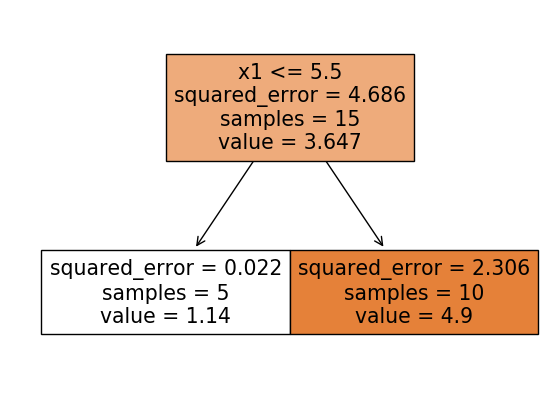

In [22]:
plt.show()

### Практика

In [29]:
ames_data = ames_data[(ames_data["Lot Frontage"] <= 150) & (ames_data["Lot Area"] <= 20000)]

ames_sample = ames_data[['Lot Frontage', 'Lot Area', 'SalePrice']].sample(
    n=15, random_state=42, ignore_index=True
)

X = ames_sample[['Lot Frontage', 'Lot Area']]
y = ames_sample['SalePrice']

In [31]:
optimal_split_params = best_split(X, y, criterion=squared_error)
optimal_split_params # w(j,t)

(0, 71.0)

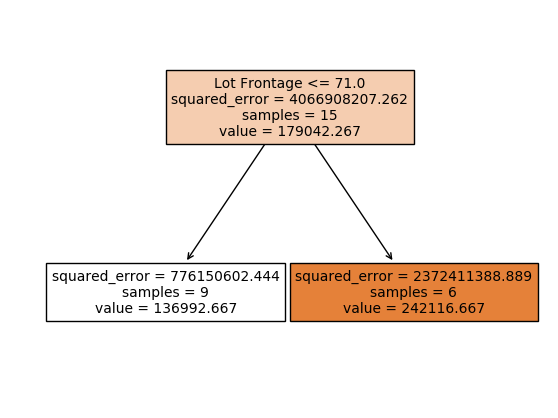

In [32]:
dt.fit(X, y)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

plt.show()

In [34]:
#взвешенная неоднородность
G = (9 / 15) * 776150602.444 + (6 / 15) * 2372411388.889
G

1414654917.022

### Критерии информативности в задаче классификации

In [12]:
# ф-ция рассчитывает энтропию Шеннона
def entropy(y):
    p = y.value_counts(normalize=True) #доли каждого из классов = вероятности принадлежности к классам
    entropy = -np.sum(p * np.log2(p))
    return entropy

In [12]:
optimal_params = best_split(X, y, criterion = entropy) #меняем критерий информативности на entropy

### Практика

In [2]:
bill_data = pd.read_csv('./bill_authentication.csv')
bill_sample = bill_data[['Variance', 'Skewness', 'Class']].sample(
    n=15, 
    random_state=42, 
    ignore_index=True
)

bill_data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
# Создаём обучающую выборку
X = bill_sample[['Variance', 'Skewness']]
y = bill_sample['Class']

In [60]:
optimal_split_params = best_split(X, y, criterion = entropy)
optimal_split_params # w(j,t)

(1, 3.22085)

In [13]:
# Инициализируем модель дерева решений с максимальной глубиной 1 и обучаем ее
dt = tree.DecisionTreeClassifier(
    max_depth = 1, #глубина
    criterion = 'entropy', #критерий информативности
    random_state = 0 #генератор случайных чисел
)

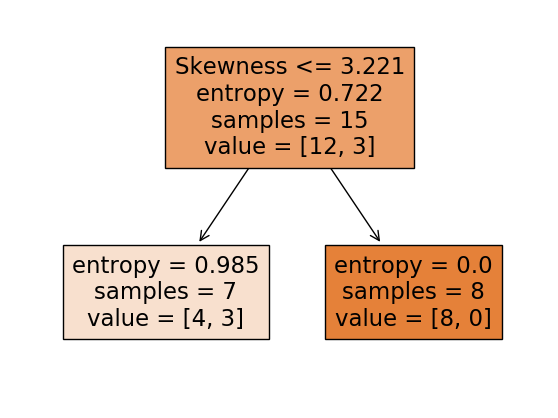

In [14]:
dt.fit(X, y)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

plt.show()

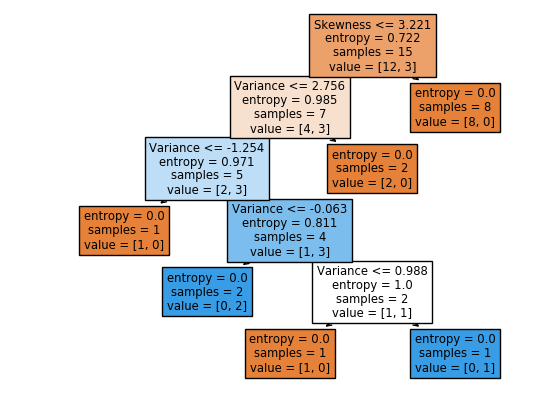

In [61]:
dt.fit(X, y)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

plt.show()

In [43]:
#взвешенная неоднородность
calculate_weighted_impurity(X,
                            y, 
                            split_params = optimal_split_params, 
                            criterion = entropy)

0.45977313014931737

### Алгоритм CART: рекурсия, критерии остановки

Итак, пусть $Q_v=\{(x, y)\}$ - множество объектов и ответов к ним, попавших в вершину с номером $v$, $N_v=|Q_v|$. Пусть задан критерий информативности $H(Q)$, который зависит от задачи (регрессия - squared error, absolute error или poisson, классификация - gini или entropy).
 
А также задан некоторый критерий остановки рекурсии $stop\_criterion(Q_v)$. 

Наш алгоритм построения дерева решений CART будет выглядеть следующим образом:
1. Создаем вершину под номером $v$
2. Проверяем критерий остановки $stop\_criterion(Q_v)$ <p>
    2.1. Если условие выполнено.
    Формируем листовую вершину $v$ и ставим в соответствие этому листу ответ $\hat{y_v}$, который будет выдаваться для новых объектов, которые дойдут до этого листа. Назовем эту часть $create\_leaf()$.
    * Регрессия:
    $$\hat{y_v}=\frac{1}{N_v}\sum_{y ∈ Q_v}y$$
    $$или$$
    $$\hat{y_v}={median}_{y ∈ Q_v}(y)$$
    * Классификация:
    $$P_{vk}=\frac{1}{N_v}\sum_{y ∈ Q_v}[y=k],$$
    $$\hat{y_v}=argmax_{k∈K}(P_{vk})$$
    2.2. Если условие остановки не выполнено.
    Строим решающий пень. Формируем решающее правило $B(x_j, t)$ для вершины $v$. Из возможных комбинаций $w=(j, t)$ находим такую, которая определяет наилучшее разбиение текущего множества объектов и ответов к ним $Q_v$
    $$G(Q, w) = \frac{N_v^{left}}{N_v} H(Q_v^{left}) + \frac{N_v^{right}}{N} H(Q_v^{right})  \Rightarrow min_{w}$$
    
    $$w_{opt} = argmin_w(G(Q_v, w))$$
    
    $$B_v(x_j, t) = [x_{j_{opt}} \leqslant t_{opt}]$$
    Для выборок $Q_v^{left}$ и $Q_v^{right}$ процедура будет повторяться рекурсивно, пока не выполнится критерий остановки.
3. Возвращаем созданную вершину

In [21]:
# создаём вспомогательный класс вершины
class Node: #все параметры None по умолчанию
    def __init__(self, left=None, 
                 right=None, value=None, 
                 split_params=None, impurity=None,
                 samples=None, is_leaf=False):
        self.left = left #ссылка на левого потомка
        self.right = right #ссылка на правого потомка
        self.split_params = split_params #параметры разбиения
        self.value = value #ответ алгоритма
        self.impurity = impurity #неоднородность в вершине (для расчёта важности признаков)
        self.samples = samples #количетсво объектов, попавших в вершину
        self.is_leaf = is_leaf #булева переменная: является ли вершина корневой

def create_leaf_prediction(y): #самый популярный класс, мода
    value = y.mode()[0]
    return value

#для задачи регрессии
#  def create_leaf_prediction(y):
#    value = y.mean()
#    return value

def stopping_criterion(X, y, criterion): #критерий остановки, критерий информативности = 0
    return criterion(y) == 0

# ф-ция реализует рекурсивный алгоритм построения дерева решений
def build_decision_tree(X, y, criterion):
    if stopping_criterion(X, y, criterion):
        value = create_leaf_prediction(y)
        node = Node(
            value=value, 
            impurity=criterion(y), 
            samples=y.size,
            is_leaf=True
        )
    else:
        split_params = best_split(X, y, criterion=entropy)
        X_left, y_left, X_rigth, y_right = split(X, y, split_params)
        left = build_decision_tree(X_left, y_left, criterion)
        right = build_decision_tree(X_rigth, y_right, criterion)       
        node = Node(
            left=left, right=right, 
            split_params=split_params, 
            impurity=criterion(y), 
            samples=y.size
        )
    return node

# вспомогательная ф-ция, выводит дерево решений в виде текста
def print_decision_tree(node, depth=0):
    depth += 1
    if node.is_leaf:
        print('   ' * depth, 'class: {}'.format(node.value))
    else:
        print('   ' * depth, 'feature_{} <= {:.3f}:'.format(*node.split_params))
        print_decision_tree(node.left, depth=depth)
        print('   ' * depth, 'feature_{} > {:.3f}:'.format(*node.split_params))
        print_decision_tree(node.right, depth=depth)

In [45]:
# Создаем обучающую выборку
data = pd.DataFrame({
    'age': [17, 64, 18, 20, 38, 49, 55, 25, 29, 31],
    'income': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102],
    'loan': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
})
X = data[['age', 'income']]
y = data['loan'] 
# Строим дерево решений и печатаем его на экран
decision_tree = build_decision_tree(X, y, criterion=entropy)
print_decision_tree(decision_tree)

    feature_0 <= 43.500:
       feature_1 <= 86.000:
          feature_0 <= 22.500:
             feature_0 <= 19.000:
                class: 1
             feature_0 > 19.000:
                class: 0
          feature_0 > 22.500:
             class: 1
       feature_1 > 86.000:
          class: 0
    feature_0 > 43.500:
       class: 0


In [46]:
# Создаем модель дерева решений
dt = tree.DecisionTreeClassifier(
    criterion = 'entropy', #критерий информативности
    random_state = 1000 #генератор случайных чисел
)
dt.fit(X, y)
# Выводим дерево решений на экран в виде списка условий
print(tree.export_text(decision_tree=dt))

|--- feature_0 <= 43.50
|   |--- feature_1 <= 86.00
|   |   |--- feature_0 <= 22.50
|   |   |   |--- feature_0 <= 19.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  19.00
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  22.50
|   |   |   |--- class: 1
|   |--- feature_1 >  86.00
|   |   |--- class: 0
|--- feature_0 >  43.50
|   |--- class: 0



### Алгоритм предсказывания целевой переменной для новых объектов

In [47]:
def predict_sample(node, x):
    if node.is_leaf:
        return node.value
    j, t = node.split_params
    if x[j] <= t:
        return predict_sample(node.left, x)
    else:
        return predict_sample(node.right, x)  

def predict(decision_tree, X):
    predictions = [predict_sample(decision_tree, x) for x in X.values]
    return np.array(predictions)

# Предсказываем целевую переменную
y_pred = predict(decision_tree, X)
print('Predictions: {}'.format(y_pred))

Predictions: [1 0 1 0 1 0 0 1 1 0]


В реализации дерева решений в sklearn предусмотрено несколько критериев при выполнении одного из которых ветвление дерева прекращается:
* Достижения однородности (основной критерий)
* Ограничение максимальной глубины дерева (параметр max_depth)
* Ограничение на максимальное количество листьев в дереве (параметр max_leaf_node)
* Ограничение на минимальное количество объектов, при которых допускается ветвление дерева (параметр min_samples_split)
* Ограничение на минимальное количество объектов, необходимых для создания листа (параметр min_samples_leaf)

In [10]:
def stopping_criterion(X, y, criterion, max_depth=None, depth=0):
    if max_depth is None:
        return (criterion(y) == 0) 
    else:
        return (criterion(y) == 0) or (depth > max_depth)
    
def build_decision_tree(X, y, criterion, max_depth=None, depth=0):
    depth += 1
    if stopping_criterion(X, y, criterion, max_depth, depth):
        value = create_leaf_prediction(y)
        node = Node(
            value=value, 
            impurity=criterion(y), 
            samples=y.size,
            is_leaf=True
        )
    else:
        split_params = best_split(X, y, criterion=entropy)
        X_left, y_left, X_rigth, y_right = split(X, y, split_params)
        left = build_decision_tree(X_left, y_left, criterion, max_depth, depth)
        right = build_decision_tree(X_rigth, y_right, criterion, max_depth, depth)       
        node = Node(
            left=left, right=right, 
            split_params=split_params, 
            impurity=criterion(y), 
            samples=y.size
        )
    return node

# Строим дерево решений с ограничением глубины и печатаем его на экран
decision_tree = build_decision_tree(X, y, criterion=entropy, max_depth=2)
print_decision_tree(decision_tree)

    feature_0 <= 43.500:
       feature_1 <= 86.000:
          class: 1
       feature_1 > 86.000:
          class: 0
    feature_0 > 43.500:
       class: 0


### Практика

In [48]:
bill_data = pd.read_csv('./bill_authentication.csv')
bill_sample = bill_data[['Variance', 'Skewness', 'Class']].sample(
    n=15, 
    random_state=42, 
    ignore_index=True
)

bill_data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [49]:
# Создаём обучающую выборку
X = bill_sample[['Variance', 'Skewness']]
y = bill_sample['Class']

In [50]:
# Строим дерево решений с ограничением глубины и печатаем его на экран
decision_tree = build_decision_tree(X, y, criterion=entropy)
print_decision_tree(decision_tree)

    feature_1 <= 3.221:
       feature_0 <= 2.756:
          feature_0 <= -1.254:
             class: 0
          feature_0 > -1.254:
             feature_0 <= -0.063:
                class: 1
             feature_0 > -0.063:
                feature_0 <= 0.988:
                   class: 0
                feature_0 > 0.988:
                   class: 1
       feature_0 > 2.756:
          class: 0
    feature_1 > 3.221:
       class: 0


In [56]:
dt = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=0 #генератор случайных чисел
)

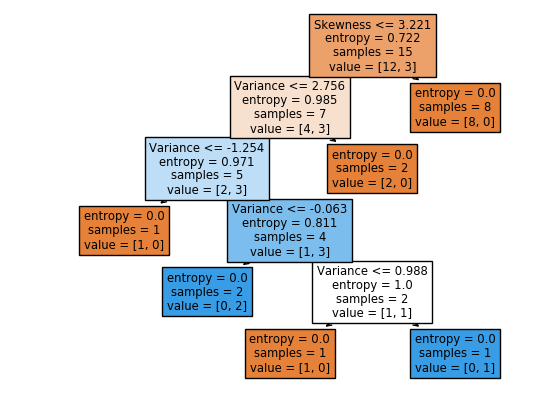

In [57]:
dt.fit(X, y)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

plt.show()

### Критерии остановки

In [2]:
data = pd.DataFrame({
    'age': [17, 64, 18, 20, 38, 49, 55, 25, 29, 31],
    'income': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102],
    'y': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
})
# Создаём обучающую выборку
X = data[['age', 'income']]
y = data['y']

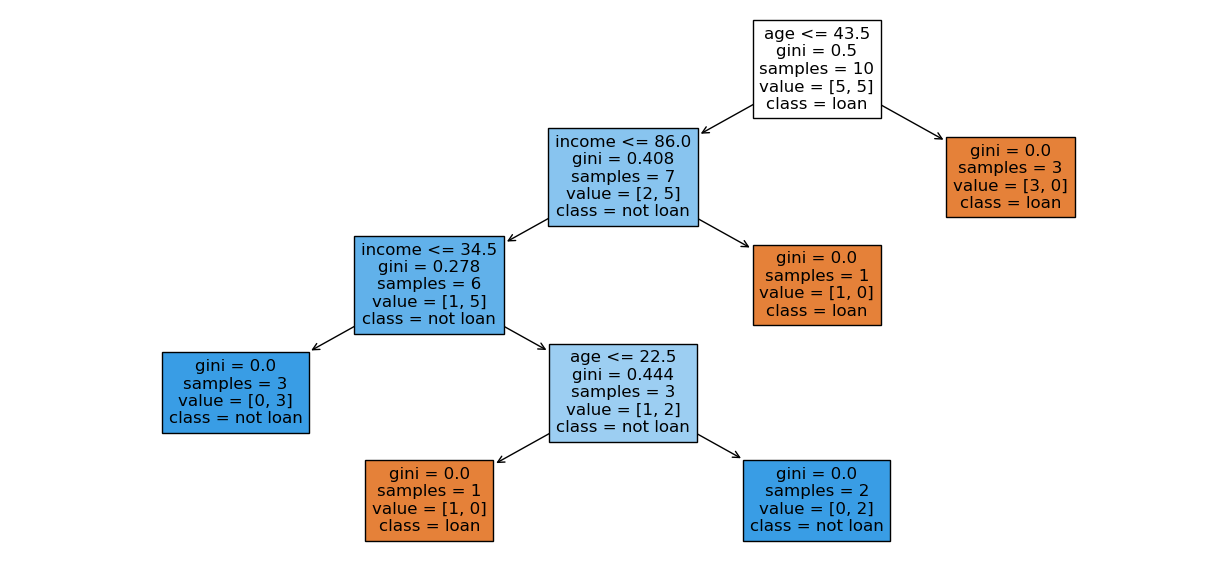

In [3]:
dt = tree.DecisionTreeClassifier(random_state=42)
dt.fit(X, y)


fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

plt.show()

In [4]:
dt = tree.DecisionTreeClassifier(
    max_depth=3, #ограничение глубины
    random_state=42
)
dt.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [5]:
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

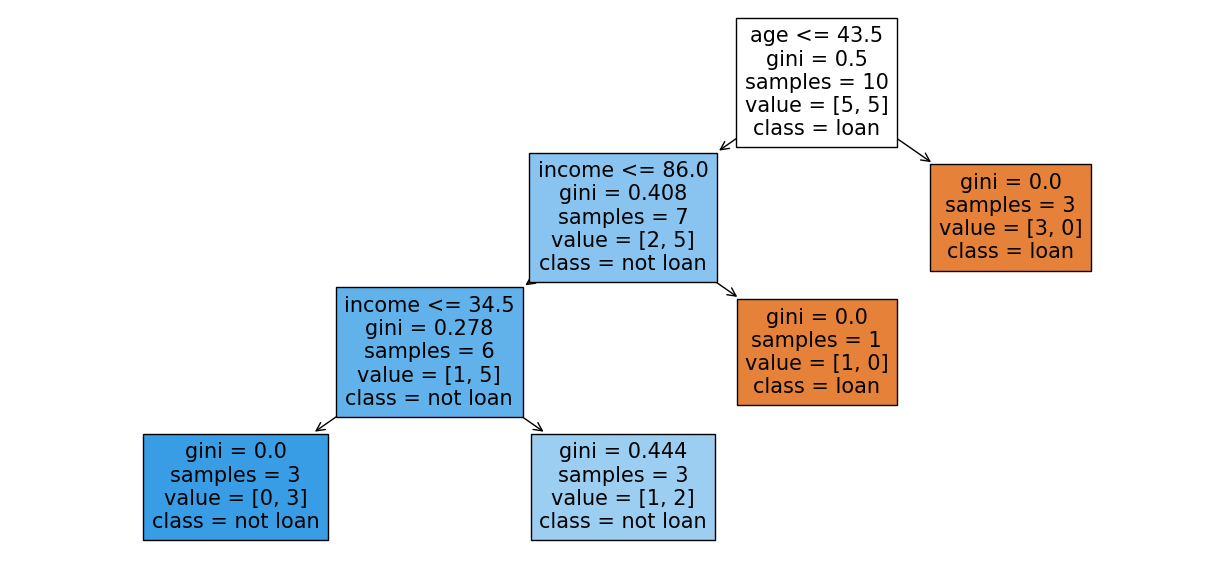

In [6]:
plt.show()

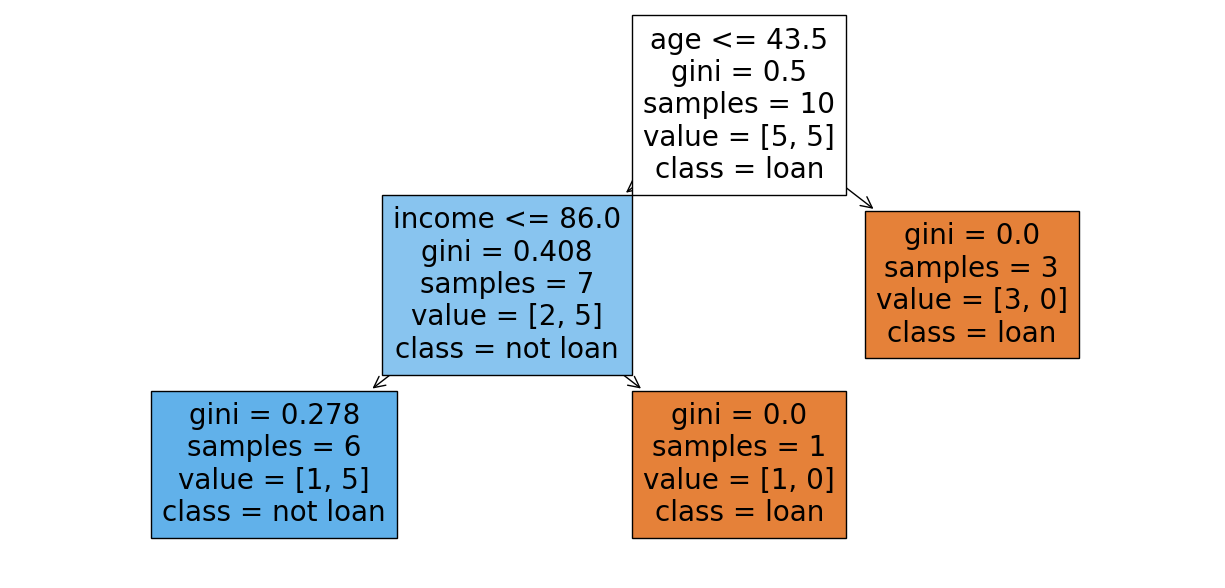

In [7]:
dt = tree.DecisionTreeClassifier(
    max_leaf_nodes=3, #ограничим число листьев
    random_state=42
)
dt.fit(X, y)

fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

plt.show()

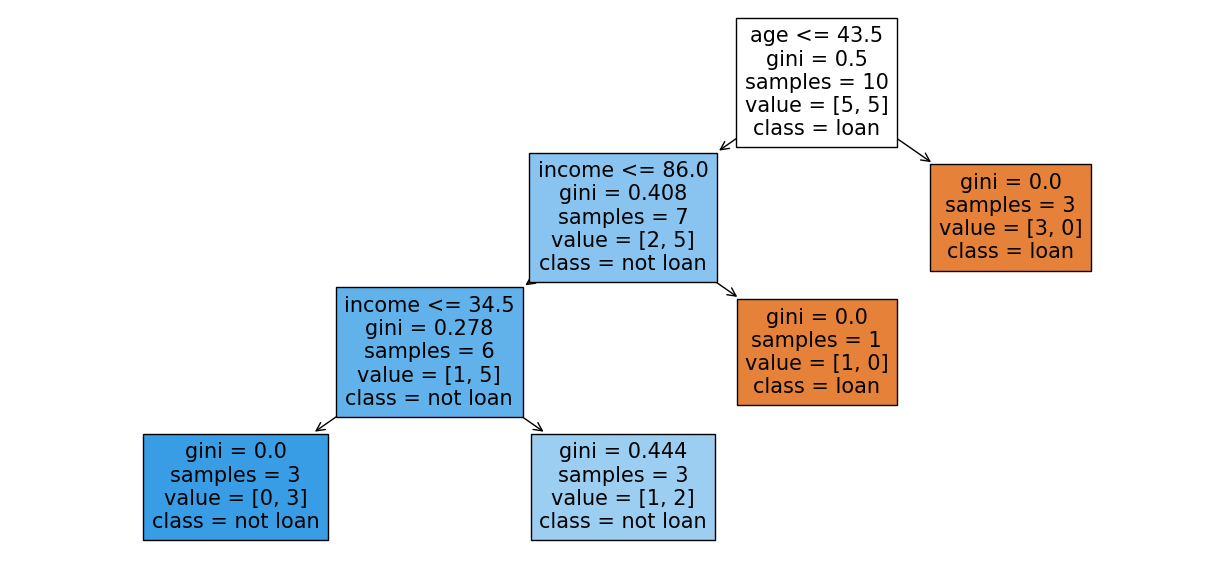

In [8]:
dt = tree.DecisionTreeClassifier(
    min_samples_split=6, #минимальное количество объектов в вершине, при котором продолжится ветвление
    random_state=42
)
dt.fit(X, y)


fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

plt.show()

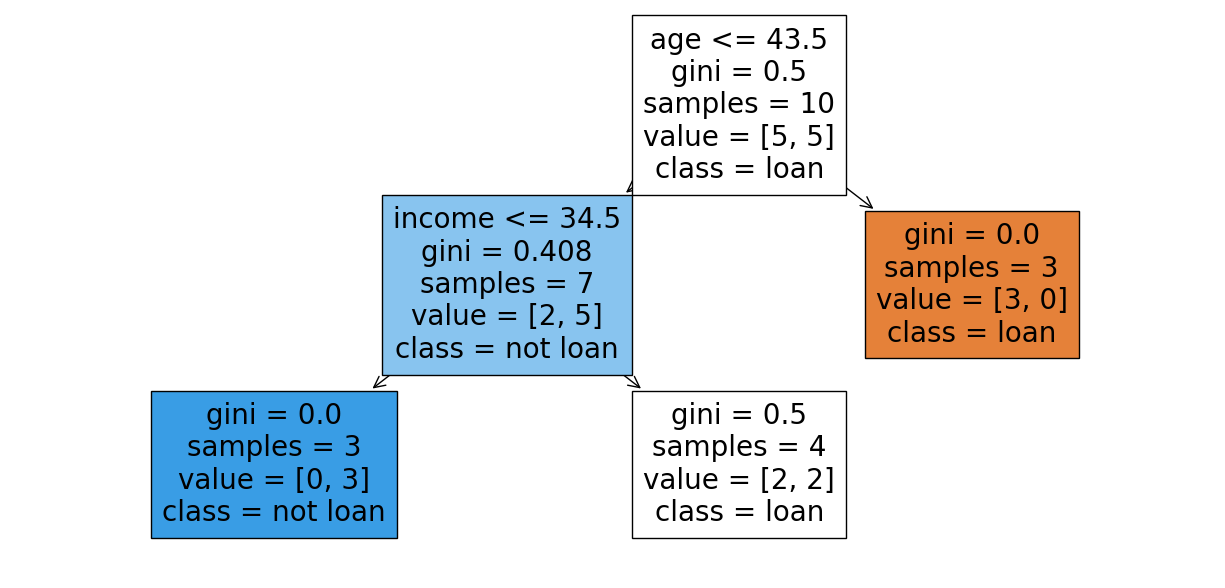

In [9]:
dt = tree.DecisionTreeClassifier(
    min_samples_leaf=3, #минимальное количество объектов, необходимых для создания листа
    random_state=42
)
dt.fit(X, y)


fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

plt.show()

In [22]:
#адаптируем метод построения дерево решений

def stopping_criterion(X, y, criterion, max_depth=None, depth=0):
    if max_depth is None:
        return (criterion(y) == 0) 
    else:
        return (criterion(y) == 0) or (depth > max_depth)
    
def build_decision_tree(X, y, criterion, max_depth=None, depth=0):
    depth += 1
    if stopping_criterion(X, y, criterion, max_depth, depth):
        value = create_leaf_prediction(y)
        node = Node(
            value=value, 
            impurity=criterion(y), 
            samples=y.size,
            is_leaf=True
        )
    else:
        split_params = best_split(X, y, criterion=entropy)
        X_left, y_left, X_right, y_right = split(X, y, split_params)
        left = build_decision_tree(X_left, y_left, criterion, max_depth, depth)
        right = build_decision_tree(X_right, y_right, criterion, max_depth, depth)       
        node = Node(
            left=left, right=right, 
            split_params=split_params, 
            impurity=criterion(y), 
            samples=y.size
        )
    return node

In [23]:
#строим дерево решений с ограничением глубины и выводим его на экран
decision_tree = build_decision_tree(X, y, criterion=entropy, max_depth=2)
print_decision_tree(decision_tree)

    feature_0 <= 43.500:
       feature_1 <= 86.000:
          class: 1
       feature_1 > 86.000:
          class: 0
    feature_0 > 43.500:
       class: 0


### Алгоритм CART: значимость признаков

Прирост информации: 
$$IG(Q_v, w)=H(Q_v)-G(Q_v, w)=H(Q_v)- \frac{N_v^{left}}{N_v} H(Q_v^{left})-\frac{N_v^{right}}{N_v} H(Q_v^{right})$$
или:
$$IG(Q_v, w)= {N_v} H(Q_v) - {N_v^{left}} H(Q_v^{left})- {N_v^{right}} H(Q_v^{right})$$

Тогда значимость **(абсолютная)** признаков будет определяться как:
$$F(x_j)=\frac{1}{N} \sum_{v ∈ V_j}IG(Q_v, w)$$

Нормируем полученные соотношения и получим **относительную** значимость:
$$\overline{F(x_j)}=\frac{F(x_j)}{\sum_{j =1}^M F(x_j)}$$

In [24]:
def calculate_feature_importances(node, feature_importance=None): #на вход - обученное дерево решений
    if feature_importance is None:
        feature_importance = np.zeros(X.shape[1])
    if node.value is None:
        j = node.split_params[0]
        feature_importance[j] += node.impurity * node.samples - \
                                 node.left.impurity * node.left.samples - \
                                 node.right.impurity * node.right.samples
        calculate_feature_importances(node.left, feature_importance)
        calculate_feature_importances(node.right, feature_importance)
    feature_importance /= node.samples
    feature_importance /= feature_importance.sum()
    return feature_importance

In [25]:
# Создаем обучающую выборку
data = pd.DataFrame({
    'age': [17, 64, 18, 20, 38, 49, 55, 25, 29, 31],
    'income': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102],
    'loan': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
})
X = data[['age', 'income']]
y = data['loan'] 
# Строим дерево решений и печатаем его на экран
decision_tree = build_decision_tree(X, y, entropy)
# Считаем информативности признаков
print(calculate_feature_importances(decision_tree))

[0.78582905 0.21417095]


In [26]:
# Создаём модель дерева решений и обучаем её
dt = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=1000 #генератор случайных чисел
)
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=1000)

In [27]:
dt.feature_importances_

array([0.78582905, 0.21417095])

### Практика

In [33]:
# признак.Age
G_01 = 0.273*(190+37)/(204+116) + 0.256*(14+79)/(204+116)
IG1 = 0.462 - G_01
IG1*320

62.06100000000001

In [34]:
G_11 = 0.444*(6+12)/(14+79) + 0.191*(8+67)/(14+79)
IG2 = 0.256 - G_11
IG2*93

1.4910000000000005

In [35]:
G_21 = 0*(127+0)/(182+7) + 0.2*(55+7)/(182+7)
IG3 = 0.071 - G_21
IG3*189

1.0189999999999975

In [36]:
F_1 = (IG1*320 + IG2*93 + IG3*189) / (204 + 116)
round(F_1, 3)

0.202

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [39]:
voice_data = pd.read_csv('./voice_gender.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [40]:
voice_data.shape

(3168, 21)

In [42]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [43]:
voice_data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [47]:
X = voice_data.drop(labels = ['label'], axis = 1)
y = voice_data['label']

In [49]:
# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                    test_size=0.2, 
                                                                    stratify=y, 
                                                                    random_state=42)


In [50]:
X_train.shape

(2534, 20)

In [51]:
X_test.shape

(634, 20)

In [64]:
dt = tree.DecisionTreeClassifier(
    max_depth = 1, #глубина
    criterion = 'entropy', #критерий информативности
    random_state = 42
)

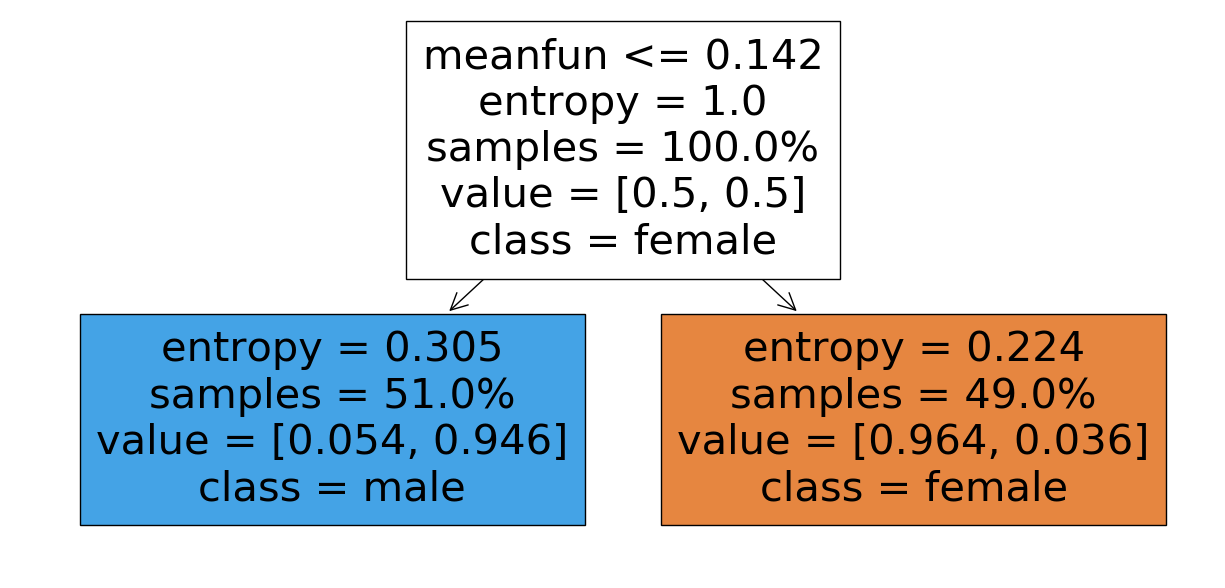

In [65]:
dt.fit(X, y)

# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X.columns, #имена факторов
    proportion=True, #выводить ли количество данных в пропорциях
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
    class_names=dt.classes_, #имена класс
);

plt.show()

In [56]:
(88 + 1528) / (1584 + 1584)

0.51010101010101

In [66]:
# Делаем предсказание
y_test_pred = dt.predict(X_test)
# Считаем метрику accuracy на тестовой выборке
metrics.accuracy_score(y_test, y_test_pred)

0.9574132492113565

In [61]:
print('Accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Accuracy: 0.957


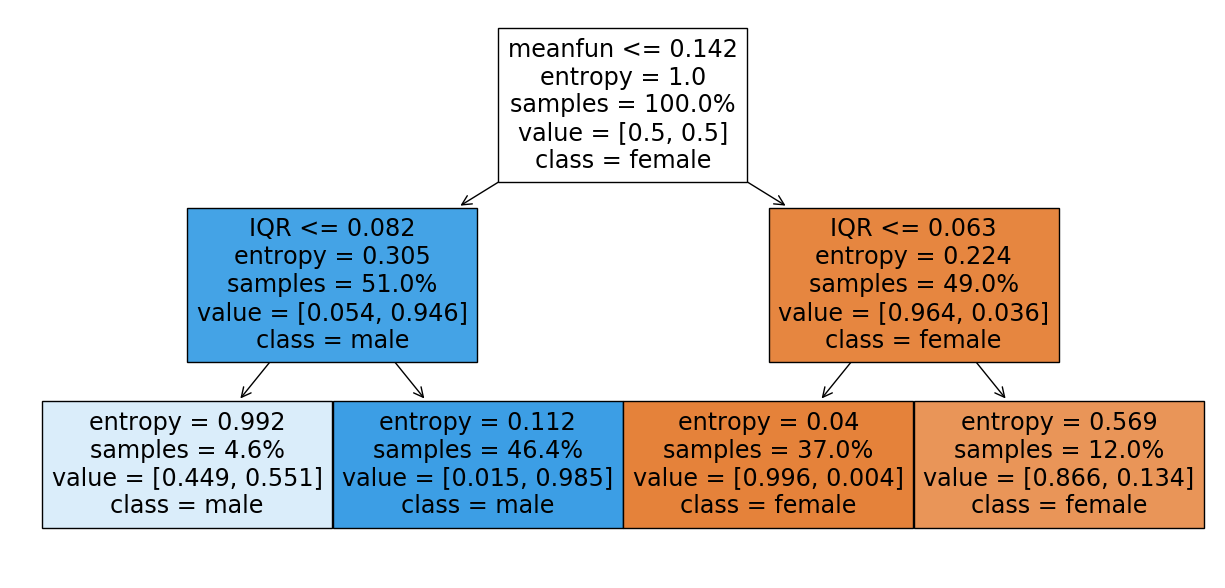

In [67]:
dt = tree.DecisionTreeClassifier(
    max_depth = 2, #глубина
    criterion = 'entropy', #критерий информативности
    random_state = 42
)

dt.fit(X, y)

# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X.columns, #имена факторов
    proportion=True, #выводить ли количество данных в пропорциях
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
    class_names=dt.classes_, #имена классов
);

plt.show()

In [68]:
# Делаем предсказание
y_test_pred = dt.predict(X_test)
# Считаем метрику accuracy на тестовой выборке
metrics.accuracy_score(y_test, y_test_pred)

0.9574132492113565

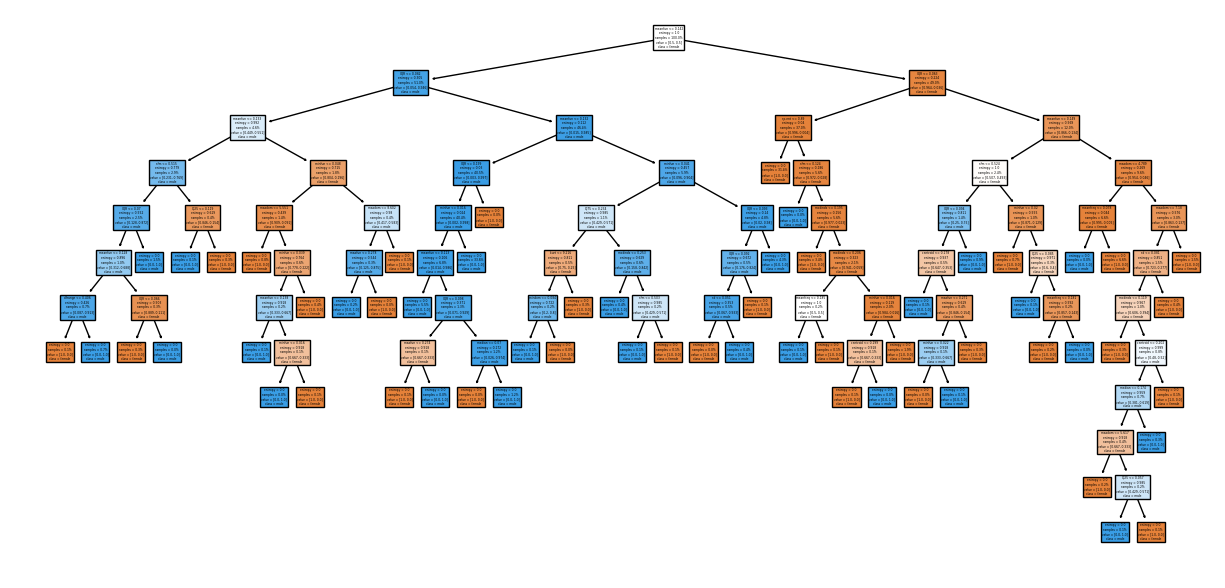

In [69]:
dt = tree.DecisionTreeClassifier(
    #max_depth = 2, #глубина
    criterion = 'entropy', #критерий информативности
    random_state = 0
)

dt.fit(X, y)

# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X.columns, #имена факторов
    proportion=True, #выводить ли количество данных в пропорциях
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
    class_names=dt.classes_, #имена классов
);

plt.show()

In [70]:
dt.get_depth()

11

In [74]:
dt.get_n_leaves()

59

In [75]:
# Делаем предсказание
y_train_pred = dt.predict(X_train)
# Считаем метрику accuracy на тренировочной выборке
metrics.accuracy_score(y_train, y_train_pred)

1.0

In [76]:
# Делаем предсказание
y_test_pred = dt.predict(X_test)
# Считаем метрику accuracy на тестовой выборке
metrics.accuracy_score(y_test, y_test_pred)

1.0

Найдём оптимальные внешние параметры перебором по сетке Grid SearchCV с кросс-валидацией

In [77]:
# Задаем сетку параметров
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}

# Задаем метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)

# Инициализируем поиск на сетке и обучаем его
gs = model_selection.GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=0), #модель
    param_grid=param_grid, #сетка параметров
    scoring='accuracy', #метрика
    cv=cv, #кросс-валидатор
    n_jobs=-1 #используем все мощности процессора
)
gs.fit(X_train, y_train)
print(gs.best_params_)
# Определяем наилучшую модель
best_tree = gs.best_estimator_

# Делаем предсказание
y_train_pred = best_tree.predict(X_train)
y_test_pred = best_tree.predict(X_test)
# Считаем метрику accuracy на обучающей и тестовой выборках
print('Train accuracy: {:.3f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
print('Test accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}
Train accuracy: 0.996
Test accuracy: 0.970


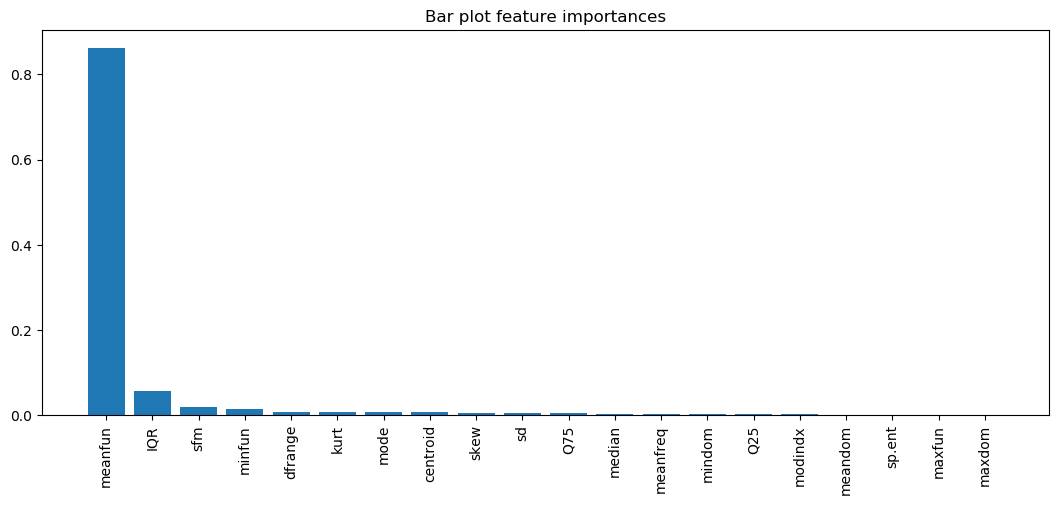

In [83]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
features = X.columns #признаки
feature_importances = best_tree.feature_importances_ #важность признаков
# Создаём DataFrame, содержащий информацию о важности признаков
importances_data = pd.DataFrame({'features': features, 'importances': feature_importances})
importances_data = importances_data.sort_values(by='importances', ascending=False)
# Строим столбчатую диаграмму
ax.bar(data=importances_data, x='features', height='importances');
# Добавляем подпись к графику и поворот меток на оси абсцисс
ax.set_title('Bar plot feature importances')
ax.xaxis.set_tick_params(rotation=90)

plt.show()